# Machine Failure
Using Kaggle dataset https://www.kaggle.com/datasets/dineshmanikanta/machine-failure-predictions/data


## Importing Data 

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [162]:
data = pd.read_csv("machine failure.csv")
print(data.head(), type(data))

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [163]:
data.shape

(10000, 14)

In [164]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [165]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

The dataset is composed of numerical and categorical data types. This dataset did not contain any NA values.

## Preliminary Stats

### Features
From this dataset, udi, productID, product type, air temperature, process temperature, rotational speed, torque, tool wear, machine failure, tool wear failure, heat dissipation failure, power failure, overstrain failure, and random failures as features. UDI and productId are redundant in purpose, so one can be dropped.
https://www.kaggle.com/code/zakikurdya/predictive-maintenance#Dataset-Description-%F0%9F%93%83 for insight on which each feature means and how it was measured.

#### Numerical Features

In [166]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<ipython-input-167-1bdf8d1ace1d>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax= ax, grid= False);


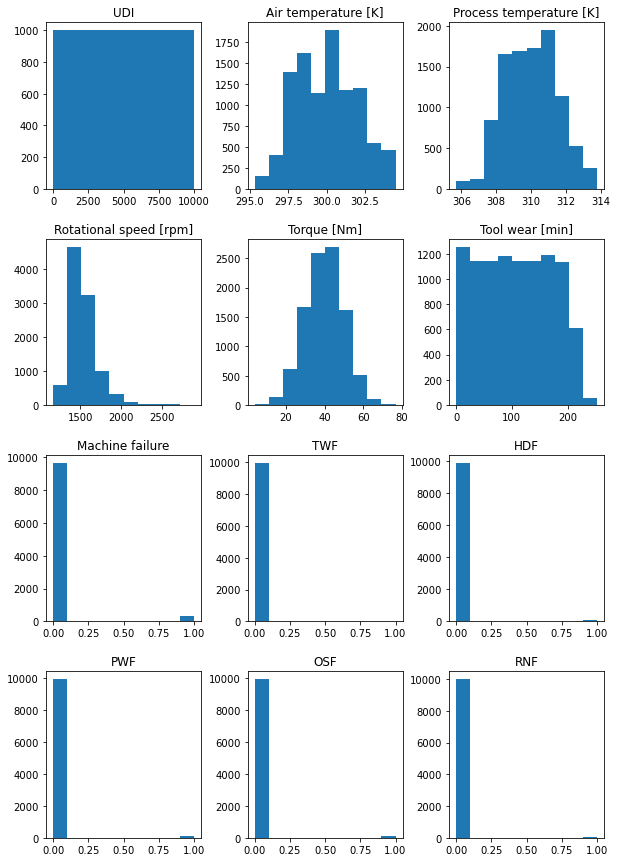

In [167]:
fig = plt.figure(figsize=(10,15))
ax = fig.gca()

data.hist(ax= ax, grid= False);

So far, torque is the only feature that follows a normal distribution. The features machine failure, TWF, HDF, PWF, OSF, and RNF are discrete variables.

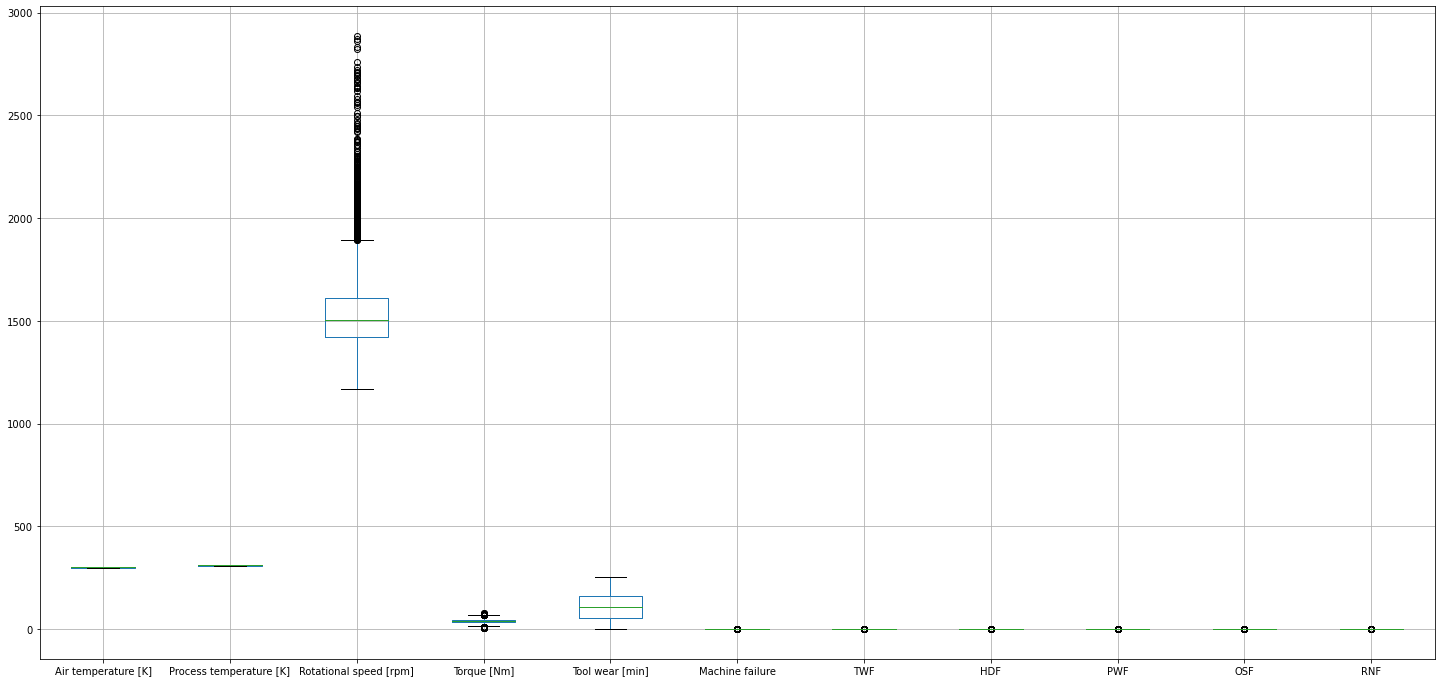

In [168]:
fig = plt.figure(figsize=(25,12))
ax = fig.gca()

data.boxplot(column= ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']);

#### Categorical Features

In [169]:
pid = data.iloc[:,1]
pid.nunique()

10000

In [170]:
types = data.iloc[:,2]
types.unique()

array(['M', 'L', 'H'], dtype=object)

Since the ProductID is a unique identifier, it can be replaced with standard indexing. Also, the L, M, H product types are redundant through out the set of data. We will create dummies from this column of data.

## Analysis without Transformation and Categorical variables to Classify Machine Failure

### Classification

In [171]:
#pip install scikit-learn

In [172]:
import sklearn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import tree

#### Random Forest 

#### Decision Trees 

#### Gradient Boosted Decision Trees

#### Extra Trees 

#### Logistic Regression

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import tree

data.Type = pd.get_dummies(data.Type, drop_first=True, dtype=float)

feat = data.loc[:, 'Type':'RNF']

## Principal Component Analysis

In [174]:
pca_1 = PCA(n_components = 1)
pca_2 = PCA(n_components = 2)
pca_3 = PCA(n_components = 3)

principalComponents = pca_1.fit_transform(feat)
principalComponents = pca_2.fit_transform(feat)
principalComponents = pca_3.fit_transform(feat)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.8875611058314044
0.9991807680984303
0.9998209146198536


## Splitting train and test data

In [175]:
X = data.drop(['UDI', 'Product ID','Machine failure'], axis=1)
y = data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Pipeline creation and accuracy score generation for Logistic Regression, Decision Tree Classifier, and Random Forest Classifier

In [176]:
#Logistic Regression
pipe_lr = Pipeline([('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=42))])
pipe_lr.fit(X_train, y_train)
print('Logistic Regression accuracy:', pipe_lr.score(X_test, y_test))

#Decision Tree Classifier
pipe_tree = Pipeline([('pca', PCA(n_components=2)),
                     ('clf', DecisionTreeClassifier(random_state=42))])
pipe_tree.fit(X_train, y_train)
print('Decision tree classifier accuracy:', pipe_tree.score(X_test, y_test))

#Random Forest
pipe_rf = Pipeline([('pca', PCA(n_components=2)),
                   ('clf', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train, y_train)
print('Random forest classifier accuracy:', pipe_rf.score(X_test, y_test))

Logistic Regression accuracy: 0.9712
Decision tree classifier accuracy: 0.9484
Random forest classifier accuracy: 0.9692


In [188]:
data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [189]:
data.TWF.value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [190]:
data.HDF.value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [191]:
data.PWF.value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [192]:
data.OSF.value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [193]:
data.RNF.value_counts()

0    9981
1      19
Name: RNF, dtype: int64